In [1]:
# pip install supervenn

In [1]:
import supervenn, pandas

In [2]:
import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 
                            'font.family':'calibri', 
                            'xtick.labelsize':16, 
                            'ytick.labelsize':16, 
                            'figure.figsize':(16*(2/3), 9*(2/3)), 
                            'axes.labelsize':20
                           })

# define annotations for later

In [3]:
annotation_file = '/Users/cmb17/Documents/PhD/Results/Capan-1/RNAseq/annotation.tsv'
annotation = pandas.read_csv(annotation_file, sep='\t')
annotation

,Unnamed: 0,ensembl_transcript_id,ensembl_gene_id,external_gene_name,gene_biotype,description
0,1,ENST00000387314,ENSG00000210049,MT-TF,Mt_tRNA,mitochondrially encoded tRNA-Phe (UUU/C) [Sour...
1,2,ENST00000389680,ENSG00000211459,MT-RNR1,Mt_rRNA,mitochondrially encoded 12S rRNA [Source:HGNC ...
2,3,ENST00000387342,ENSG00000210077,MT-TV,Mt_tRNA,mitochondrially encoded tRNA-Val (GUN) [Source...
3,4,ENST00000387347,ENSG00000210082,MT-RNR2,Mt_rRNA,mitochondrially encoded 16S rRNA [Source:HGNC ...
4,5,ENST00000386347,ENSG00000209082,MT-TL1,Mt_tRNA,mitochondrially encoded tRNA-Leu (UUA/G) 1 [So...
...,...,...,...,...,...,...
278215,278216,ENST00000441160,ENSG00000228437,LINC02474,lncRNA,long intergenic non-protein coding RNA 2474 [S...
278216,278217,ENST00000412098,ENSG00000229463,LYST-AS1,lncRNA,LYST antisense RNA 1 [Source:HGNC Symbol;Acc:H...
278217,278218,ENST00000438371,ENSG00000229291,LINC02768,lncRNA,long intergenic non-protein coding RNA 2768 [S...
278218,278219,ENST00000715678,ENSG00000229291,LINC02768,lncRNA,long intergenic non-protein coding RNA 2768 [S...


# super venn

In [4]:
input_dir = '/Users/cmb17/Documents/PhD/Results/Capan-1/RNAseq/'
output_dir = '/Users/cmb17/Documents/PhD/Results/Capan-1/RNAseq/'

df = pandas.read_csv(input_dir+'KO_VS_Ctrl.tsv', sep='\t', index_col=0)
a = set(df.index)
print(len(a))

df = pandas.read_csv(input_dir+'KO_VS_17-4.2.tsv', sep='\t', index_col=0)
b = set(df.index)
print(len(b))

df = pandas.read_csv(input_dir+'KO_VS_17-1.8.tsv', sep='\t', index_col=0)
c = set(df.index)
print(len(c))

df = pandas.read_csv(input_dir+'17-4.2_VS_17-1.8.tsv', sep='\t', index_col=0)
d = set(df.index)
print(len(d))

834
1450
1687
1469


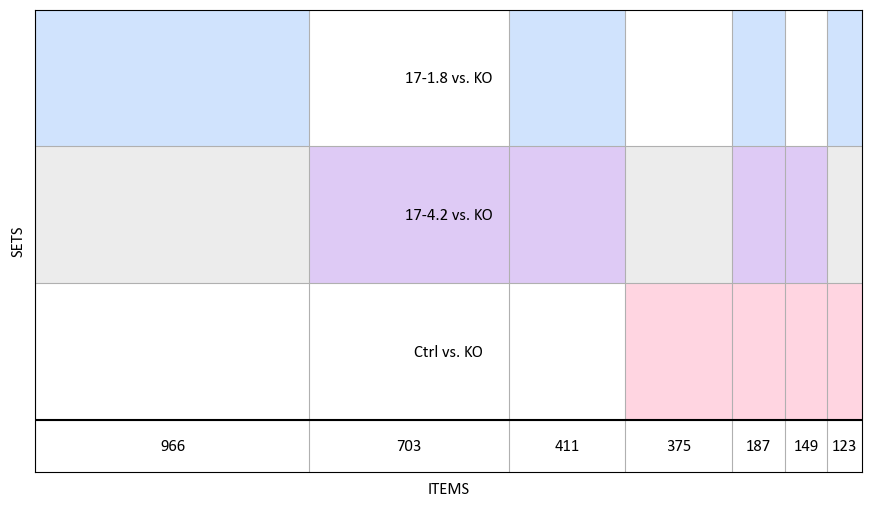

In [5]:
sets = [a, b, c]
labels = ['Ctrl vs. KO', '17-4.2 vs. KO', '17-1.8 vs. KO']
mso = supervenn.supervenn(sets, labels,
                          side_plots=False, chunks_ordering='size', 
                          reverse_sets_order=False, fontsize=12, color_cycle=['xkcd:pastel pink', 'xkcd:light violet', 'xkcd:powder blue'])

matplotlib.pyplot.show()
#matplotlib.pyplot.savefig('supervenn1.svg')

In [6]:
print(966 + 411 + 187 + 123)
print(703 + 411 + 187 + 149)
print(375 + 187 + 149 + 123)

1687
1450
834


In [7]:
#pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [12]:
%%time

# explore what happened with the effect of restoring ATG7(2) in absence of ATG7(1), independently of the levels
Group1 = mso.chunks[frozenset([1, 2])]
print(len(Group1))

container4table = []

for ensembl in list(Group1):
    symbol = list(set(annotation[annotation['ensembl_gene_id'] == ensembl]['external_gene_name'].values))[0]
    description = list(set(annotation[annotation['ensembl_gene_id'] == ensembl]['description'].values))[0].split(' [')[0]
    biotype = list(set(annotation[annotation['ensembl_gene_id'] == ensembl]['gene_biotype'].values))[0].split(' [')[0]
    #print('{}\t{}\t{}\t{}'.format(ensembl, symbol, description, biotype))

    #fill up for storing info as a table
    container4table.append([ensembl, symbol, description, biotype])

#finalize & store table
print('storing file...')
table = pandas.DataFrame(container4table, columns=['ENSEMBL', 'Symbol', 'Description', 'Biotype'])
table.set_index('ENSEMBL', inplace=True)

label = 'ATG7(2)-dose-independent_no-ATG7(1)'
table_file = label + '.xlsx'
table.to_excel(table_file)

411
storing file...
CPU times: total: 23.9 s
Wall time: 23.9 s


In [7]:
%%time

# explore what happened with the effect of restoring ATG7(2) in absence of ATG7(1), independently of the levels
Group1 = mso.chunks[frozenset([1, 2])]
print(len(Group1))

container4table = []

for ensembl in list(Group1):
    symbol = list(set(annotation[annotation['ensembl_gene_id'] == ensembl]['external_gene_name'].values))[0]
    description = list(set(annotation[annotation['ensembl_gene_id'] == ensembl]['description'].values))[0].split(' [')[0]
    biotype = list(set(annotation[annotation['ensembl_gene_id'] == ensembl]['gene_biotype'].values))[0].split(' [')[0]
    #print('{}\t{}\t{}\t{}'.format(ensembl, symbol, description, biotype))

    #fill up for storing info as a table
    container4table.append([ensembl, symbol, description, biotype])

#finalize & store table
print('storing file...')
table = pandas.DataFrame(container4table, columns=['ENSEMBL', 'Symbol', 'Description', 'Biotype'])
table.set_index('ENSEMBL', inplace=True)

label = 'ATG7(2)-dose-independent_no-ATG7(1)'
table_file = label + '.tsv'
table.to_csv(table_file, sep='\t')

411
storing file...
CPU times: total: 21.3 s
Wall time: 21.4 s


In [8]:
%%time

# explore what happened with the effect of restoring ATG7(2) in presence of ATG7(1), independently of the levels
Group2 = mso.chunks[frozenset([0, 1, 2])]
print(len(Group2))

container4table = []

for ensembl in list(Group2):
    symbol = list(set(annotation[annotation['ensembl_gene_id'] == ensembl]['external_gene_name'].values))[0]
    description = list(set(annotation[annotation['ensembl_gene_id'] == ensembl]['description'].values))[0].split(' [')[0]
    biotype = list(set(annotation[annotation['ensembl_gene_id'] == ensembl]['gene_biotype'].values))[0].split(' [')[0]
    #print('{}\t{}\t{}\t{}'.format(ensembl, symbol, description, biotype))

    #fill up for storing info as a table
    container4table.append([ensembl, symbol, description, biotype])

#finalize & store table
print('storing file...')
table = pandas.DataFrame(container4table, columns=['ENSEMBL', 'Symbol', 'Description', 'Biotype'])
table.set_index('ENSEMBL', inplace=True)

label = 'ATG7(2)-dose-independent_ATG7(1)'
table_file = label + '.tsv'
table.to_csv(table_file, sep='\t')

187
storing file...
CPU times: total: 9.64 s
Wall time: 9.84 s


In [9]:
%%time

# explore what happened with the effect of restoring high ATG7(2) in absence of ATG7(1)
Group3 = mso.chunks[frozenset([2])]
print(len(Group3))

container4table = []

for ensembl in list(Group3):
    symbol = list(set(annotation[annotation['ensembl_gene_id'] == ensembl]['external_gene_name'].values))[0]
    description = list(set(annotation[annotation['ensembl_gene_id'] == ensembl]['description'].values))[0].split(' [')[0]
    biotype = list(set(annotation[annotation['ensembl_gene_id'] == ensembl]['gene_biotype'].values))[0].split(' [')[0]
    #print('{}\t{}\t{}\t{}'.format(ensembl, symbol, description, biotype))

    #fill up for storing info as a table
    container4table.append([ensembl, symbol, description, biotype])

#finalize & store table
print('storing file...')
table = pandas.DataFrame(container4table, columns=['ENSEMBL', 'Symbol', 'Description', 'Biotype'])
table.set_index('ENSEMBL', inplace=True)

label = 'ATG7(2)-high_no-ATG7(1)'
table_file = label + '.tsv'
table.to_csv(table_file, sep='\t')

966
storing file...
CPU times: total: 50.1 s
Wall time: 51.2 s


In [10]:
%%time

# explore what happened with the effect of restoring high ATG7(2) in presence of ATG7(1)
Group4 = mso.chunks[frozenset([0, 2])]
print(len(Group4))

container4table = []

for ensembl in list(Group4):
    symbol = list(set(annotation[annotation['ensembl_gene_id'] == ensembl]['external_gene_name'].values))[0]
    description = list(set(annotation[annotation['ensembl_gene_id'] == ensembl]['description'].values))[0].split(' [')[0]
    biotype = list(set(annotation[annotation['ensembl_gene_id'] == ensembl]['gene_biotype'].values))[0].split(' [')[0]
    #print('{}\t{}\t{}\t{}'.format(ensembl, symbol, description, biotype))

    #fill up for storing info as a table
    container4table.append([ensembl, symbol, description, biotype])

#finalize & store table
print('storing file...')
table = pandas.DataFrame(container4table, columns=['ENSEMBL', 'Symbol', 'Description', 'Biotype'])
table.set_index('ENSEMBL', inplace=True)

label = 'ATG7(2)-high_ATG7(1)'
table_file = label + '.tsv'
table.to_csv(table_file, sep='\t')

123
storing file...
CPU times: total: 6.42 s
Wall time: 6.63 s


In [11]:
%%time

# explore what happened with the effect of restoring low ATG7(2) in absence of ATG7(1)
Group5 = mso.chunks[frozenset([1])]
print(len(Group5))

container4table = []

for ensembl in list(Group5):
    symbol = list(set(annotation[annotation['ensembl_gene_id'] == ensembl]['external_gene_name'].values))[0]
    description = str(list(set(annotation[annotation['ensembl_gene_id'] == ensembl]['description'].values))[0]).split(' [')[0]
    biotype = list(set(annotation[annotation['ensembl_gene_id'] == ensembl]['gene_biotype'].values))[0].split(' [')[0]
    #print('{}\t{}\t{}\t{}'.format(ensembl, symbol, description, biotype))

    #fill up for storing info as a table
    container4table.append([ensembl, symbol, description, biotype])

#finalize & store table
print('storing file...')
table = pandas.DataFrame(container4table, columns=['ENSEMBL', 'Symbol', 'Description', 'Biotype'])
table.set_index('ENSEMBL', inplace=True)

label = 'ATG7(2)-low_no-ATG7(1)'
table_file = label + '.tsv'
table.to_csv(table_file, sep='\t')

703
storing file...
CPU times: total: 36.1 s
Wall time: 36.6 s


In [12]:
%%time

# explore what happened with the effect of restoring low ATG7(2) in presence of ATG7(1)
Group6 = mso.chunks[frozenset([0, 1])]
print(len(Group6))

container4table = []

for ensembl in list(Group6):
    symbol = list(set(annotation[annotation['ensembl_gene_id'] == ensembl]['external_gene_name'].values))[0]
    description = list(set(annotation[annotation['ensembl_gene_id'] == ensembl]['description'].values))[0].split(' [')[0]
    biotype = list(set(annotation[annotation['ensembl_gene_id'] == ensembl]['gene_biotype'].values))[0].split(' [')[0]
    #print('{}\t{}\t{}\t{}'.format(ensembl, symbol, description, biotype))

    #fill up for storing info as a table
    container4table.append([ensembl, symbol, description, biotype])

#finalize & store table
print('storing file...')
table = pandas.DataFrame(container4table, columns=['ENSEMBL', 'Symbol', 'Description', 'Biotype'])
table.set_index('ENSEMBL', inplace=True)

label = 'ATG7(2)-low_ATG7(1)'
table_file = label + '.tsv'
table.to_csv(table_file, sep='\t')

149
storing file...
CPU times: total: 7.77 s
Wall time: 8.02 s


In [13]:
%%time

# explore what happened with the effect of restoring ATG7(1) in presence of ATG7(2)
Group7 = mso.chunks[frozenset([0])]
print(len(Group7))

container4table = []

for ensembl in list(Group7):
    symbol = list(set(annotation[annotation['ensembl_gene_id'] == ensembl]['external_gene_name'].values))[0]
    description = list(set(annotation[annotation['ensembl_gene_id'] == ensembl]['description'].values))[0].split(' [')[0]
    biotype = list(set(annotation[annotation['ensembl_gene_id'] == ensembl]['gene_biotype'].values))[0].split(' [')[0]
    #print('{}\t{}\t{}\t{}'.format(ensembl, symbol, description, biotype))

    #fill up for storing info as a table
    container4table.append([ensembl, symbol, description, biotype])

#finalize & store table
print('storing file...')
table = pandas.DataFrame(container4table, columns=['ENSEMBL', 'Symbol', 'Description', 'Biotype'])
table.set_index('ENSEMBL', inplace=True)

label = 'ATG7(1)'
table_file = label + '.tsv'
table.to_csv(table_file, sep='\t')

375
storing file...
CPU times: total: 19.4 s
Wall time: 19.8 s


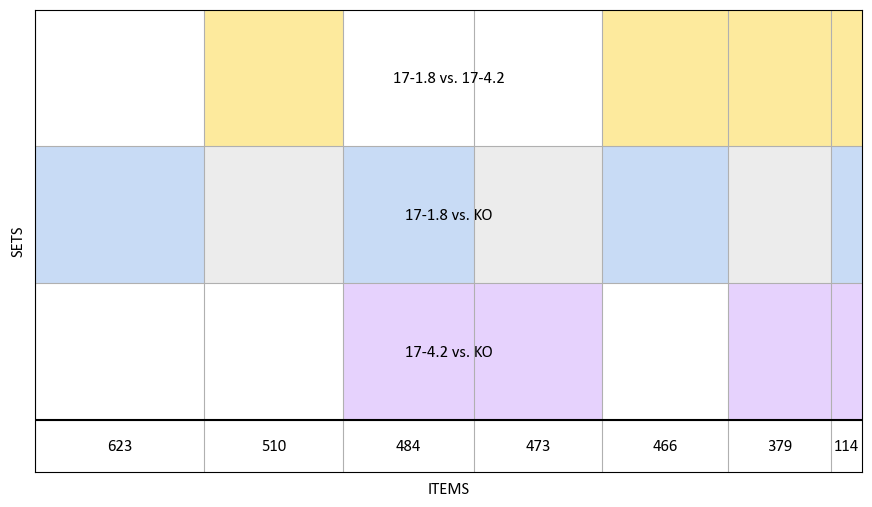

In [14]:
sets = [b, c, d]
labels = ['17-4.2 vs. KO', '17-1.8 vs. KO', '17-1.8 vs. 17-4.2']
mso = supervenn.supervenn(sets, labels,
                          side_plots=False, chunks_ordering='size', 
                          reverse_sets_order=False, fontsize=12, color_cycle=['xkcd:light violet', 'xkcd:powder blue', 'xkcd:light gold'])

matplotlib.pyplot.show()
#matplotlib.pyplot.savefig('supervenn2.svg')

In [15]:
print(510 + 466 + 379 + 114)
print(623 + 484 + 466 + 114)
print(484 + 473 + 379 + 114)

1469
1687
1450


In [16]:
%%time

# explore ATG7(2) dose response: intersect of 17-1.8 vs KO with 17-1.8 vs 17-4.2
Group8 = mso.chunks[frozenset([1, 2])]
print(len(Group8))

container4table = []

for ensembl in list(Group8):
    symbol = list(set(annotation[annotation['ensembl_gene_id'] == ensembl]['external_gene_name'].values))[0]
    description = list(set(annotation[annotation['ensembl_gene_id'] == ensembl]['description'].values))[0].split(' [')[0]
    biotype = list(set(annotation[annotation['ensembl_gene_id'] == ensembl]['gene_biotype'].values))[0].split(' [')[0]
    #print('{}\t{}\t{}\t{}'.format(ensembl, symbol, description, biotype))

    #fill up for storing info as a table
    container4table.append([ensembl, symbol, description, biotype])

#finalize & store table
print('storing file...')
table = pandas.DataFrame(container4table, columns=['ENSEMBL', 'Symbol', 'Description', 'Biotype'])
table.set_index('ENSEMBL', inplace=True)

label = 'ATG7(2)-high_vs_KO-17-4.2'
table_file = label + '.tsv'
table.to_csv(table_file, sep='\t')

466
storing file...
CPU times: total: 24.1 s
Wall time: 24.8 s


In [17]:
%%time

# explore ATG7(2) dose response: intersect of 17-4.2 vs KO with 17-1.8 vs 17-4.2
Group9 = mso.chunks[frozenset([0, 2])]
print(len(Group9))

container4table = []

for ensembl in list(Group9):
    symbol = list(set(annotation[annotation['ensembl_gene_id'] == ensembl]['external_gene_name'].values))[0]
    description = list(set(annotation[annotation['ensembl_gene_id'] == ensembl]['description'].values))[0].split(' [')[0]
    biotype = list(set(annotation[annotation['ensembl_gene_id'] == ensembl]['gene_biotype'].values))[0].split(' [')[0]
    #print('{}\t{}\t{}\t{}'.format(ensembl, symbol, description, biotype))

    #fill up for storing info as a table
    container4table.append([ensembl, symbol, description, biotype])

#finalize & store table
print('storing file...')
table = pandas.DataFrame(container4table, columns=['ENSEMBL', 'Symbol', 'Description', 'Biotype'])
table.set_index('ENSEMBL', inplace=True)

label = 'ATG7(2)-low_vs_KO-17-1.8'
table_file = label + '.tsv'
table.to_csv(table_file, sep='\t')

379
storing file...
CPU times: total: 19.5 s
Wall time: 19.8 s


In [18]:
%%time

# explore ATG7(2) dose response: intersect of 17-4.2 vs KO with 17-1.8 vs KO
Group10 = mso.chunks[frozenset([0, 1])]
print(len(Group10))

container4table = []

for ensembl in list(Group10):
    symbol = list(set(annotation[annotation['ensembl_gene_id'] == ensembl]['external_gene_name'].values))[0]
    description = list(set(annotation[annotation['ensembl_gene_id'] == ensembl]['description'].values))[0].split(' [')[0]
    biotype = list(set(annotation[annotation['ensembl_gene_id'] == ensembl]['gene_biotype'].values))[0].split(' [')[0]
    #print('{}\t{}\t{}\t{}'.format(ensembl, symbol, description, biotype))

    #fill up for storing info as a table
    container4table.append([ensembl, symbol, description, biotype])

#finalize & store table
print('storing file...')
table = pandas.DataFrame(container4table, columns=['ENSEMBL', 'Symbol', 'Description', 'Biotype'])
table.set_index('ENSEMBL', inplace=True)

label = 'ATG7(2)-dose-independent_overall'
table_file = label + '.tsv'
table.to_csv(table_file, sep='\t')

484
storing file...
CPU times: total: 25.1 s
Wall time: 25.3 s


In [19]:
%%time

# explore ATG7(2) dose response: intersect of 17-4.2 vs KO with 17-1.8 vs KO and 17-1.8 vs 17-4.2
Group11 = mso.chunks[frozenset([0, 1, 2])]
print(len(Group11))

container4table = []

for ensembl in list(Group11):
    symbol = list(set(annotation[annotation['ensembl_gene_id'] == ensembl]['external_gene_name'].values))[0]
    description = list(set(annotation[annotation['ensembl_gene_id'] == ensembl]['description'].values))[0].split(' [')[0]
    biotype = list(set(annotation[annotation['ensembl_gene_id'] == ensembl]['gene_biotype'].values))[0].split(' [')[0]
    #print('{}\t{}\t{}\t{}'.format(ensembl, symbol, description, biotype))

    #fill up for storing info as a table
    container4table.append([ensembl, symbol, description, biotype])

#finalize & store table
print('storing file...')
table = pandas.DataFrame(container4table, columns=['ENSEMBL', 'Symbol', 'Description', 'Biotype'])
table.set_index('ENSEMBL', inplace=True)

label = 'ATG7(2)-dose-gradient'
table_file = label + '.tsv'
table.to_csv(table_file, sep='\t')

114
storing file...
CPU times: total: 5.83 s
Wall time: 5.96 s
